In [1]:
#Importing the supposed libraries to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression, chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


%matplotlib nbagg
%matplotlib inline
plt.style.use('seaborn-v0_8-whitegrid')

In [2]:
#Load the data into the notebook
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.shape
#The data contains 21597  and 21 columns 

(21597, 21)

In [4]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [5]:
#We can see that the columns waterfront,yr_renovated and view have missing values which can fault our model building

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
#Above is the general tendency of the data variables

# DATA WRANGLING

In [8]:
#some of the columns do not contribute much to our model so we drop them
to_drop = ['date', 'view', 'sqft_above', 'sqft_basement', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
df = df.drop(to_drop,axis =1)

In [9]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,Average,7 Average,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  int64  
 1   price        21597 non-null  float64
 2   bedrooms     21597 non-null  int64  
 3   bathrooms    21597 non-null  float64
 4   sqft_living  21597 non-null  int64  
 5   sqft_lot     21597 non-null  int64  
 6   floors       21597 non-null  float64
 7   waterfront   19221 non-null  object 
 8   condition    21597 non-null  object 
 9   grade        21597 non-null  object 
 10  yr_built     21597 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 1.8+ MB


In [11]:
#The waterfront column still has some missing data

In [12]:
df["waterfront"].unique()

array([nan, 'NO', 'YES'], dtype=object)

In [13]:
df["waterfront"] = df["waterfront"].fillna('NO')

In [14]:
df["waterfront"].unique()

array(['NO', 'YES'], dtype=object)

In [15]:
df["waterfront"].isnull().sum()

0

We have replaced the null values in the waterfront column with no

In [16]:
#Looking for duplicates within the dataset.Some of the columns such as id should be unique identifiers hence should not have duplicates

In [17]:
df["id"].duplicated().sum()

177

In [18]:
df=df.drop_duplicates(subset = 'id',keep='first')

In [19]:
df["id"].duplicated().sum()

0

We have excluded all the duplicate values from the id column

# EXPLOLATORY DATA ANALYSIS(EDA)

UNIVARIATE ANALYSIS FOR NUMERICAL COLUMNS

In [20]:
numerical_columns = df[['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'yr_built']]
numerical_columns.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built
count,2.142000e+04,2.142000e+04,21420.000000,21420.000000,21420.000000,2.142000e+04,21420.000000,21420.000000
mean,4.580940e+09,5.407393e+05,3.373950,2.118429,2083.132633,1.512804e+04,1.495985,1971.092997
std,2.876761e+09,3.679311e+05,0.925405,0.768720,918.808412,4.153080e+04,0.540081,29.387141
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,1900.000000
25%,2.123537e+09,3.225000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1952.000000
50%,3.904921e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.614000e+03,1.500000,1975.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.069050e+04,2.000000,1997.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,2015.000000


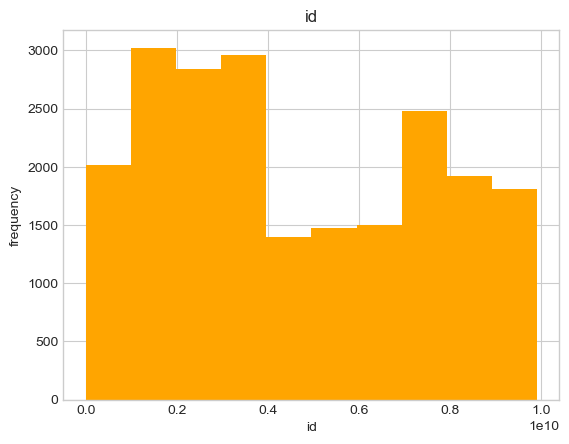

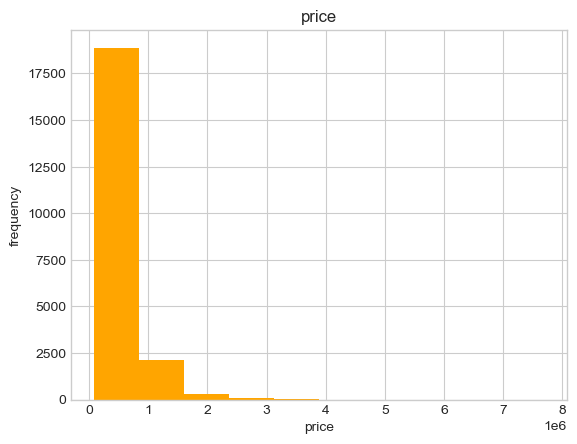

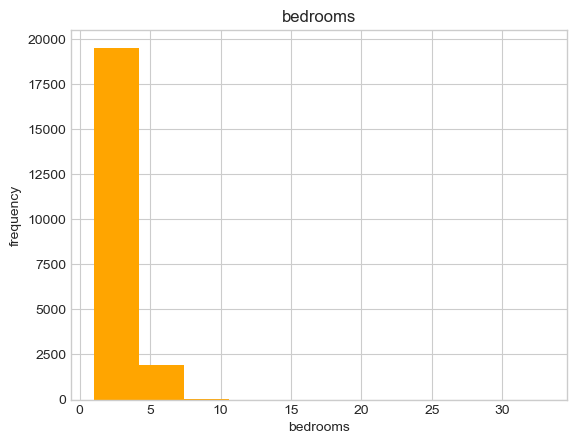

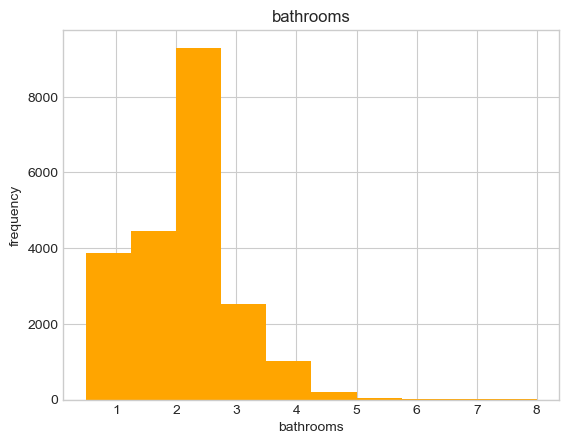

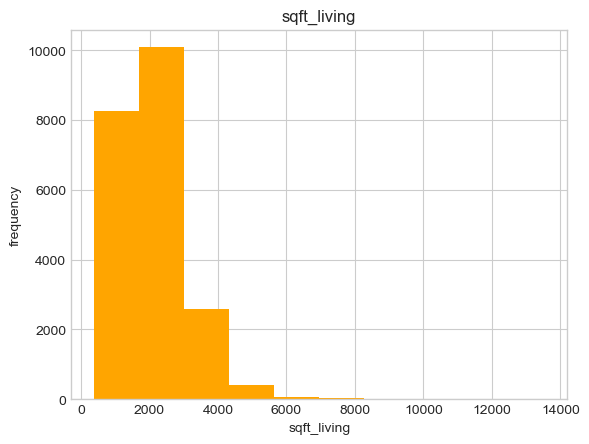

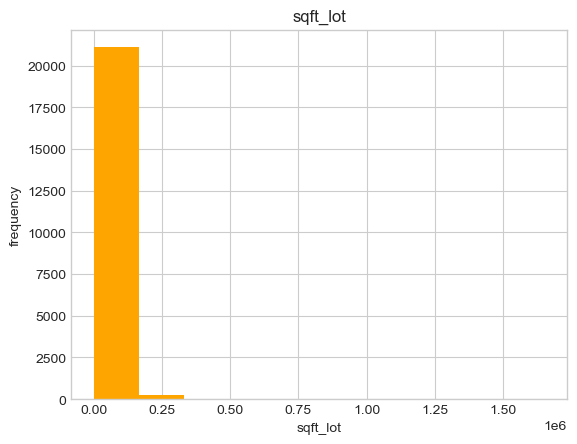

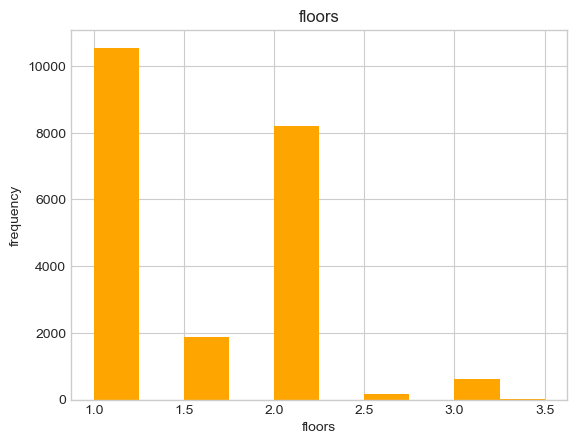

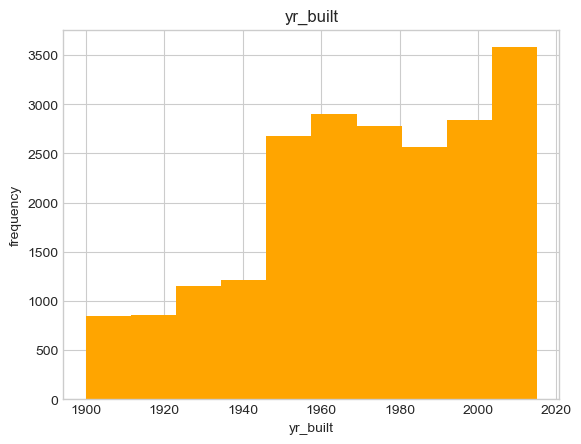

In [21]:
#visualize the numerical columns
#histogram
for column in numerical_columns:
    plt.figure()
    plt.hist(df[column],bins = 10,color = 'orange')
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('frequency')
    plt.show()
    

    

visualizing the relationship between price and numerical columns(numerical independent variables)

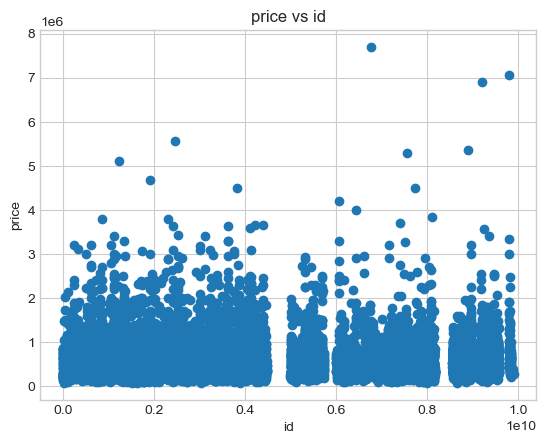

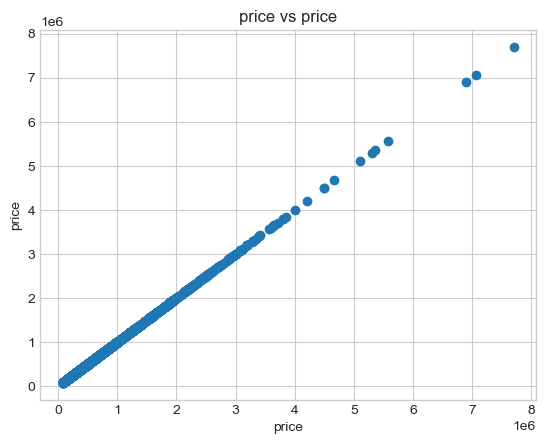

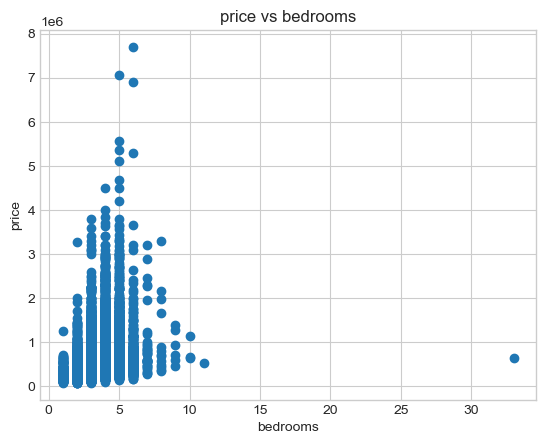

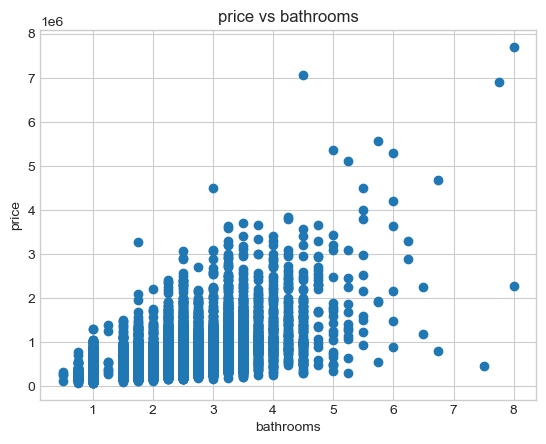

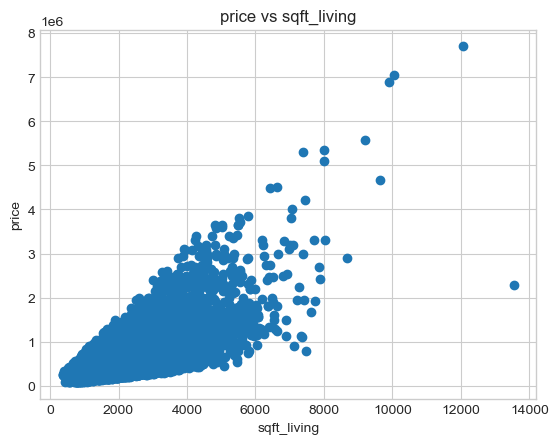

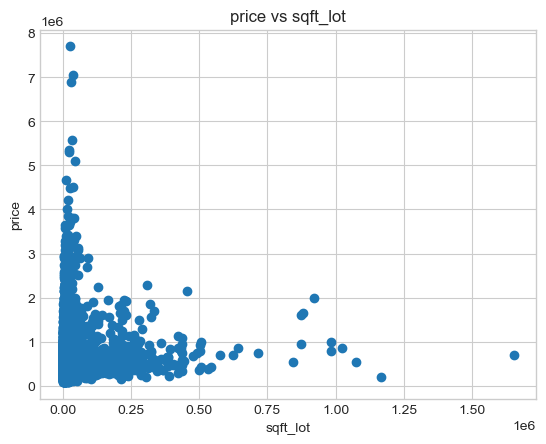

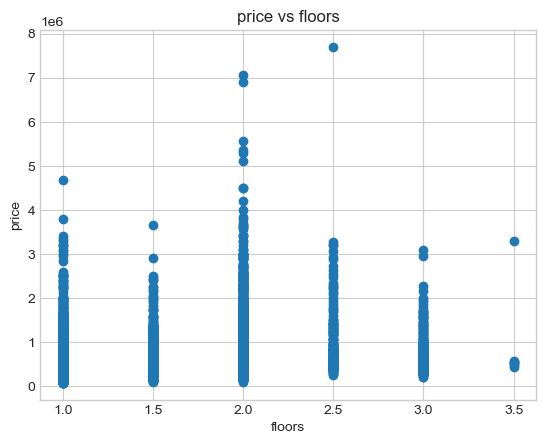

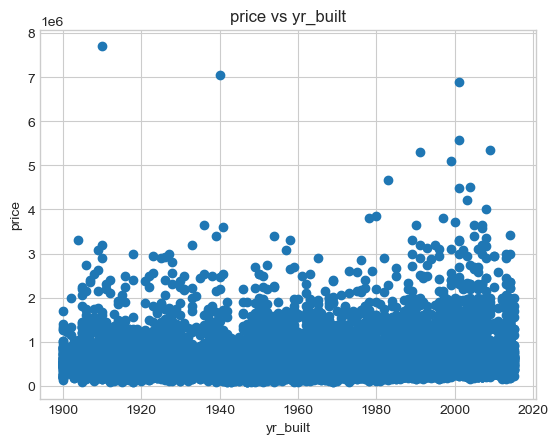

In [22]:
#scatter
for column in numerical_columns:
    plt.figure()
    plt.scatter(df[column],df['price'])
    plt.title(f"price vs {column}")
    plt.xlabel(column)
    plt.ylabel('price')
    

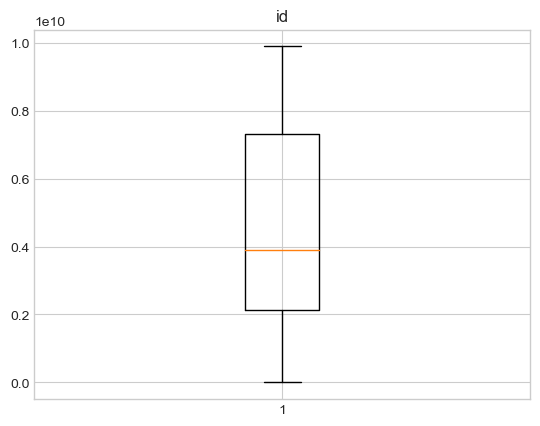

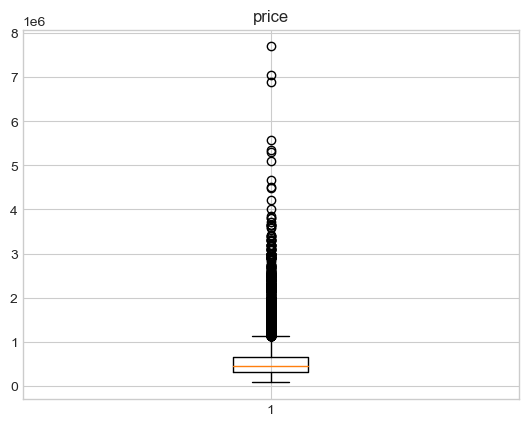

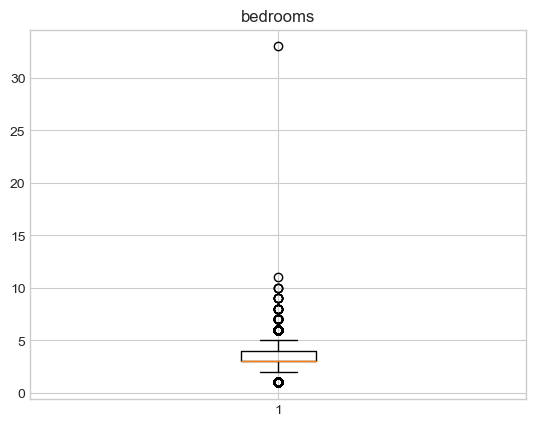

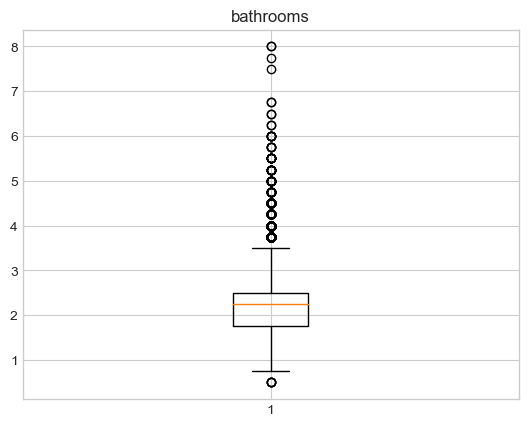

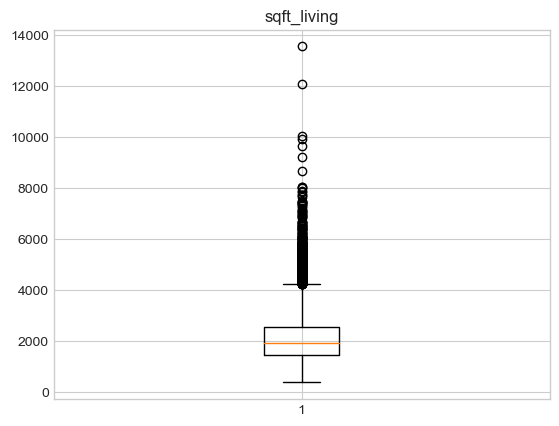

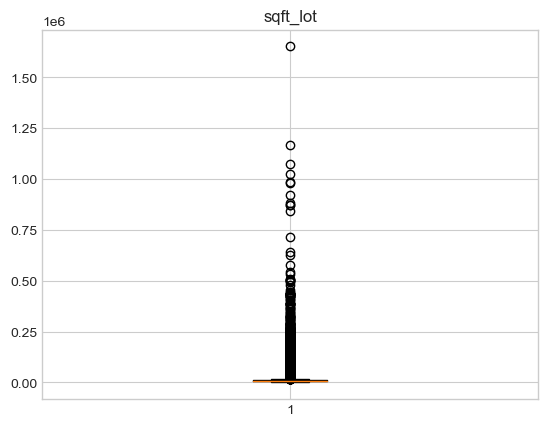

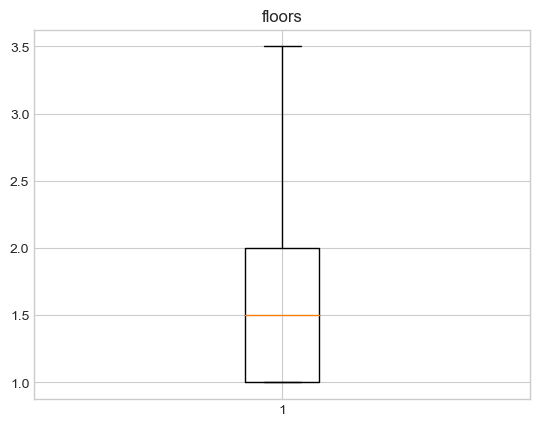

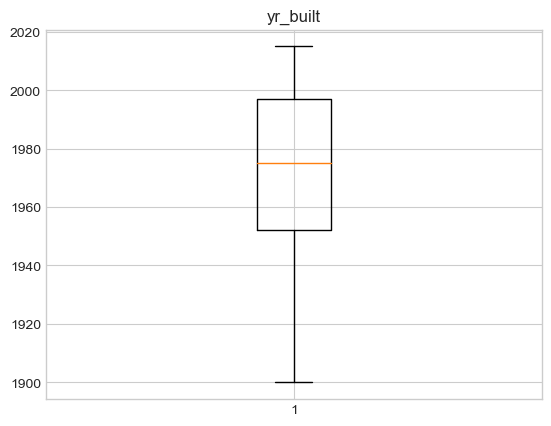

In [23]:
#box plot to check for outliers in our data
for column in numerical_columns:
    plt.figure()
    plt.boxplot(df[column])
    plt.title(column)

In [24]:
stats = numerical_columns.describe()
print(stats)

                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.142000e+04  2.142000e+04  21420.000000  21420.000000  21420.000000   
mean   4.580940e+09  5.407393e+05      3.373950      2.118429   2083.132633   
std    2.876761e+09  3.679311e+05      0.925405      0.768720    918.808412   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123537e+09  3.225000e+05      3.000000      1.750000   1430.000000   
50%    3.904921e+09  4.500000e+05      3.000000      2.250000   1920.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors      yr_built  
count  2.142000e+04  21420.000000  21420.000000  
mean   1.512804e+04      1.495985   1971.092997  
std    4.153080e+04      0.540081     29.387141  
min    5.200000e+02      1.000000   1900.000000  
25%    5.040000e+03      1.000000   19

# THE STATS SHOWN ABOVE ENTAIL:
    

The price column has a mean of 540,749 and a standard deviation of 367224. The minimum price is780,000 whereas the maximum price of a house is77000000.

The bedroom column has a mean of3.37 and a standard deviation of 0.95. The minimum number of bedrooms, is 1 and the maximum number of bedrooms is 33.

The bathrooms column has a mean of 2 and a standard deviation of 0.92. The minimum number of bathrooms is 0 and the maximum number is 8.


# THE PLOTS:


The Histogram shows the general distribution of the data.

The scatter plot shows us the relationship between the independent variables and the dependent variable price.We can see that the 'sqft-lot' and 'sqft_living' have a  continuous distribution while columns like 'bathrooms' and 'bedrooms' have a discrete distribution.

The boxplot helps us in identifying the outliers in our data shown by the points shown outside the whiskers.


In [25]:
#Dealing with outliers in our data
#We can see that some of our columns have outliers 


In [26]:
df['bathrooms'].value_counts()

bathrooms
2.50    5352
1.00    3794
1.75    3020
2.25    2031
2.00    1913
1.50    1429
2.75    1182
3.00     747
3.50     729
3.25     586
3.75     155
4.00     134
4.50      99
4.25      79
0.75      70
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: count, dtype: int64

In [27]:
df.loc[df['bedrooms'] >= 7, 'bedrooms'] = '20'

In [28]:
df['bedrooms'].value_counts()

bedrooms
3     9731
4     6849
2     2736
5     1586
6      265
1      191
20      62
Name: count, dtype: int64

In [29]:
df['bathrooms'].value_counts()

bathrooms
2.50    5352
1.00    3794
1.75    3020
2.25    2031
2.00    1913
1.50    1429
2.75    1182
3.00     747
3.50     729
3.25     586
3.75     155
4.00     134
4.50      99
4.25      79
0.75      70
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: count, dtype: int64

In [30]:
df.loc[df['bathrooms'] > 5,'bathrooms'] = 20

In [31]:
df['bathrooms'].value_counts()

bathrooms
2.50     5352
1.00     3794
1.75     3020
2.25     2031
2.00     1913
1.50     1429
2.75     1182
3.00      747
3.50      729
3.25      586
3.75      155
4.00      134
4.50       99
4.25       79
0.75       70
20.00      43
4.75       23
5.00       21
1.25        9
0.50        4
Name: count, dtype: int64

In [32]:
#calculating the z_scores for our sqft_lot and sqft_living
z_scores = (df['sqft_living'] - df['sqft_living'].mean()) / df['sqft_living'].std()

# Define a threshold value above which you consider the data points as outliers
threshold = 3

# Set the reclassified values for the outliers
reclassified_value = 9999  # Value to assign to outliers
df.loc[np.abs(z_scores) > threshold, 'sqft_living'] = reclassified_value

# Print the updated value counts for the reclassified column
print(df['sqft_living'].value_counts())

sqft_living
9999    247
1300    136
1440    133
1400    132
1660    128
       ... 
1975      1
1275      1
1979      1
2577      1
1425      1
Name: count, Length: 875, dtype: int64


In [33]:
z_scores = (df['sqft_lot'] - df['sqft_lot'].mean()) / df['sqft_lot'].std()

# Define a threshold value above which you consider the data points as outliers
threshold = 3

# Set the reclassified values for the outliers
reclassified_value = 9999  # Value to assign to outliers
df.loc[np.abs(z_scores) > threshold, 'sqft_lot'] = reclassified_value

# Print the updated value counts for the reclassified column
print(df['sqft_lot'].value_counts())

sqft_lot
5000     355
9999     343
6000     286
4000     249
7200     218
        ... 
15408      1
25990      1
37913      1
36831      1
1076       1
Name: count, Length: 9504, dtype: int64


# UNIVARIATE ANALYSIS FOR CATEGORICAL VARIABLES

Counts for waterfront:
waterfront
NO     21274
YES      146
Name: count, dtype: int64



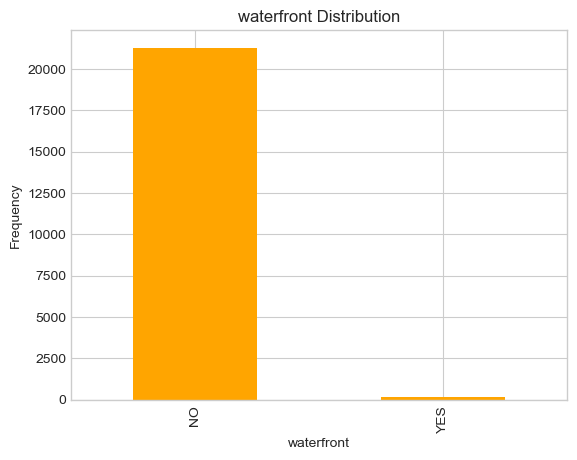

Counts for condition:
condition
Average      13900
Good          5643
Very Good     1687
Fair           162
Poor            28
Name: count, dtype: int64



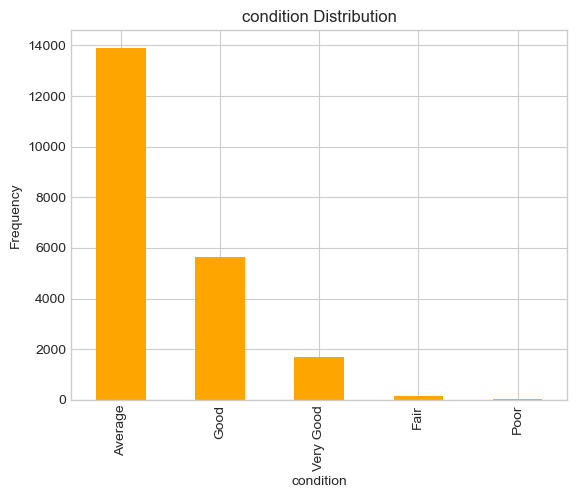

Counts for grade:
grade
7 Average        8889
8 Good           6041
9 Better         2606
6 Low Average    1995
10 Very Good     1130
11 Excellent      396
5 Fair            234
12 Luxury          88
4 Low              27
13 Mansion         13
3 Poor              1
Name: count, dtype: int64



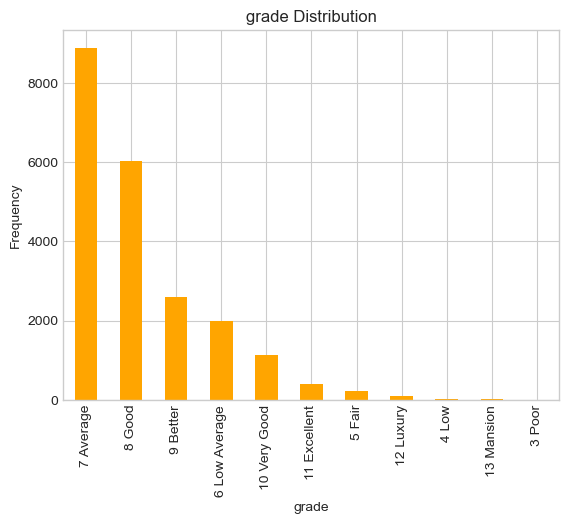

In [34]:
categorical_columns = ['waterfront', 'condition', 'grade']

# Frequency counts for each categorical column
for column in categorical_columns:
    counts = df[column].value_counts()
    print(f"Counts for {column}:")
    print(counts)
    print()

    # Bar plot for each categorical column
    plt.figure()
    counts.plot(kind='bar', color='orange')
    plt.title(f"{column} Distribution")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

From our barplots,we can see that:

Most of the houses do not have a waterfront. 21274 houses do not have a waterfront while 146 houses are the only ones that have a waterfront.

As for the condition,Average condition has the most number of houses attached while only a few houses have a poor condition.

In the grading, Average grade has 8889 houses which is evidently the most. Poor grade has only 1 house which is the least number.

# BIVARIATE ANALYSIS FOR CATEGORICAL VARIABLES 

Here we aim at looking into the relationship between the price and the categorical variables.

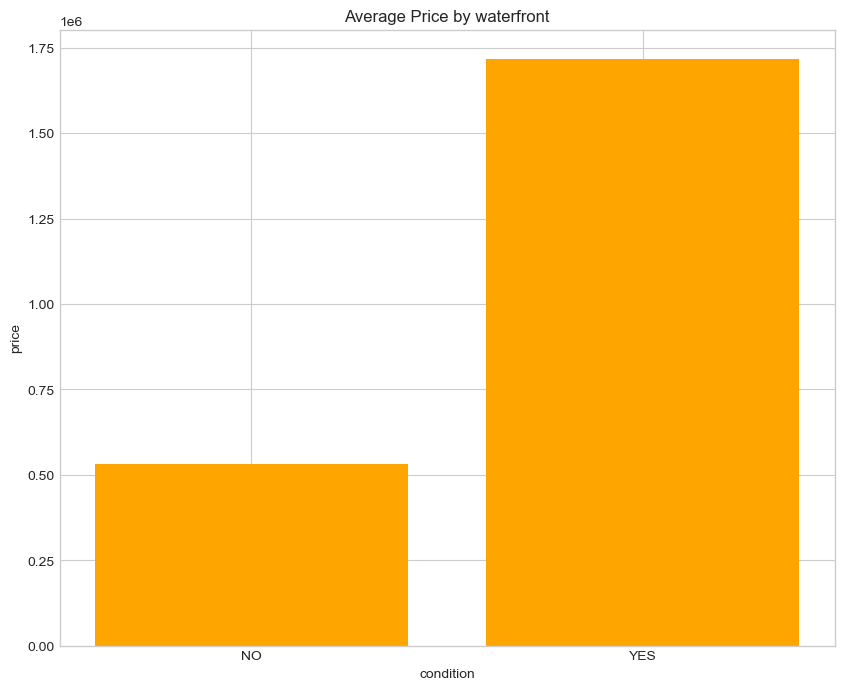

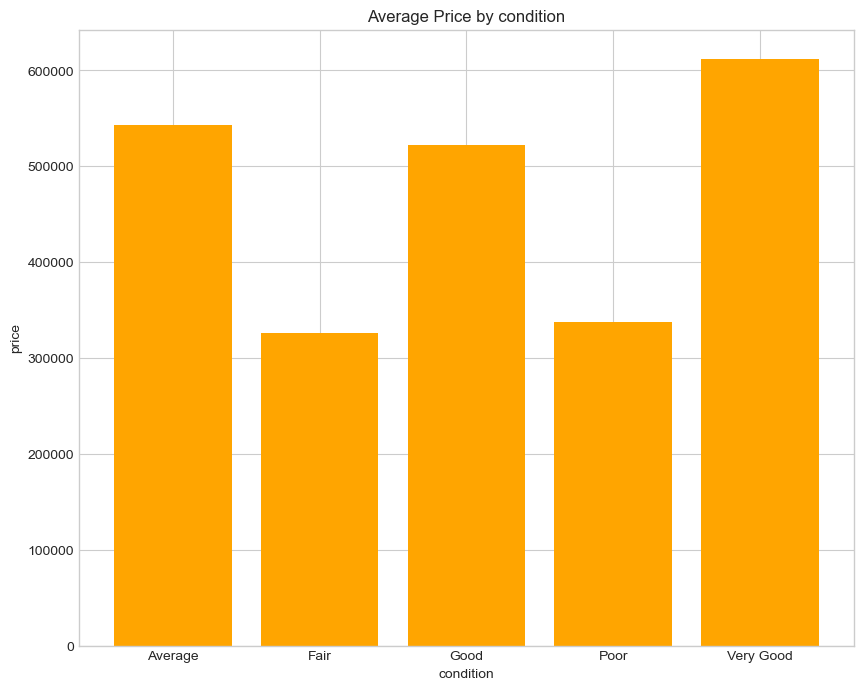

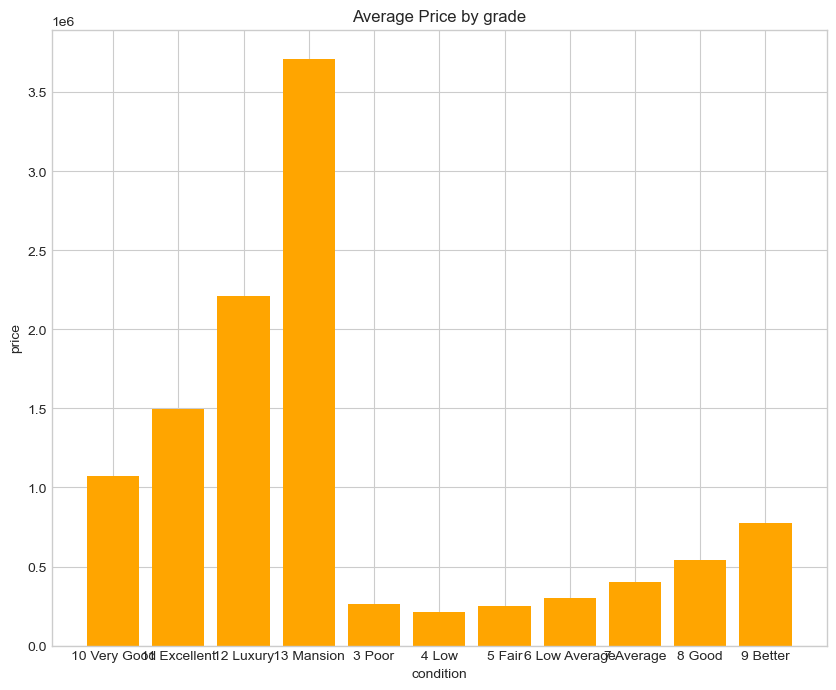

In [35]:
for column in categorical_columns:
    plt.figure(figsize = (10,8))
    column_prices = df.groupby(column)['price'].mean()
    plt.bar(column_prices.index, column_prices.values, color='orange')
    plt.xlabel('condition')
    plt.ylabel("price")
    plt.title(f'Average Price by {column}')
    plt.show()

From our visualizations above:

From the waterfront barplot,houses with a waterfront cost more than those without a waterfront. This shows that a waterfront is very important in influencing the price of a house.

In the grading,Mansion commands the highest price followed by the luxury. The houses with low condition cost the least amount of money followed by those with poor condition.

The houses with a very good condition cost the highest followed by those with a good condition. The houses with apoor and fair condition seem to have almost the same pricing in the market.


# BUILDING THE MODEL

Apply onehot encoding to turn the categorical variables into numerical columns (binary numbers) so that the model cn perform regression effectively

In [40]:

df = pd.get_dummies(df,columns = categorical_columns,drop_first = True)
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,waterfront_YES,condition_Fair,...,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,7129300520,221900.0,3,1.00,1180,5650,1.0,1955,False,False,...,False,False,False,False,False,False,False,True,False,False
1,6414100192,538000.0,3,2.25,2570,7242,2.0,1951,False,False,...,False,False,False,False,False,False,False,True,False,False
2,5631500400,180000.0,2,1.00,770,10000,1.0,1933,False,False,...,False,False,False,False,False,False,True,False,False,False
3,2487200875,604000.0,4,3.00,1960,5000,1.0,1965,False,False,...,False,False,False,False,False,False,False,True,False,False
4,1954400510,510000.0,3,2.00,1680,8080,1.0,1987,False,False,...,False,False,False,False,False,False,False,False,True,False


In [37]:
#X = df[['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'condition', 'grade', 'yr_built']]
#Y = df['price']

Chech the correlation of our data

Text(0.5, 1.0, 'correlation between the variables')

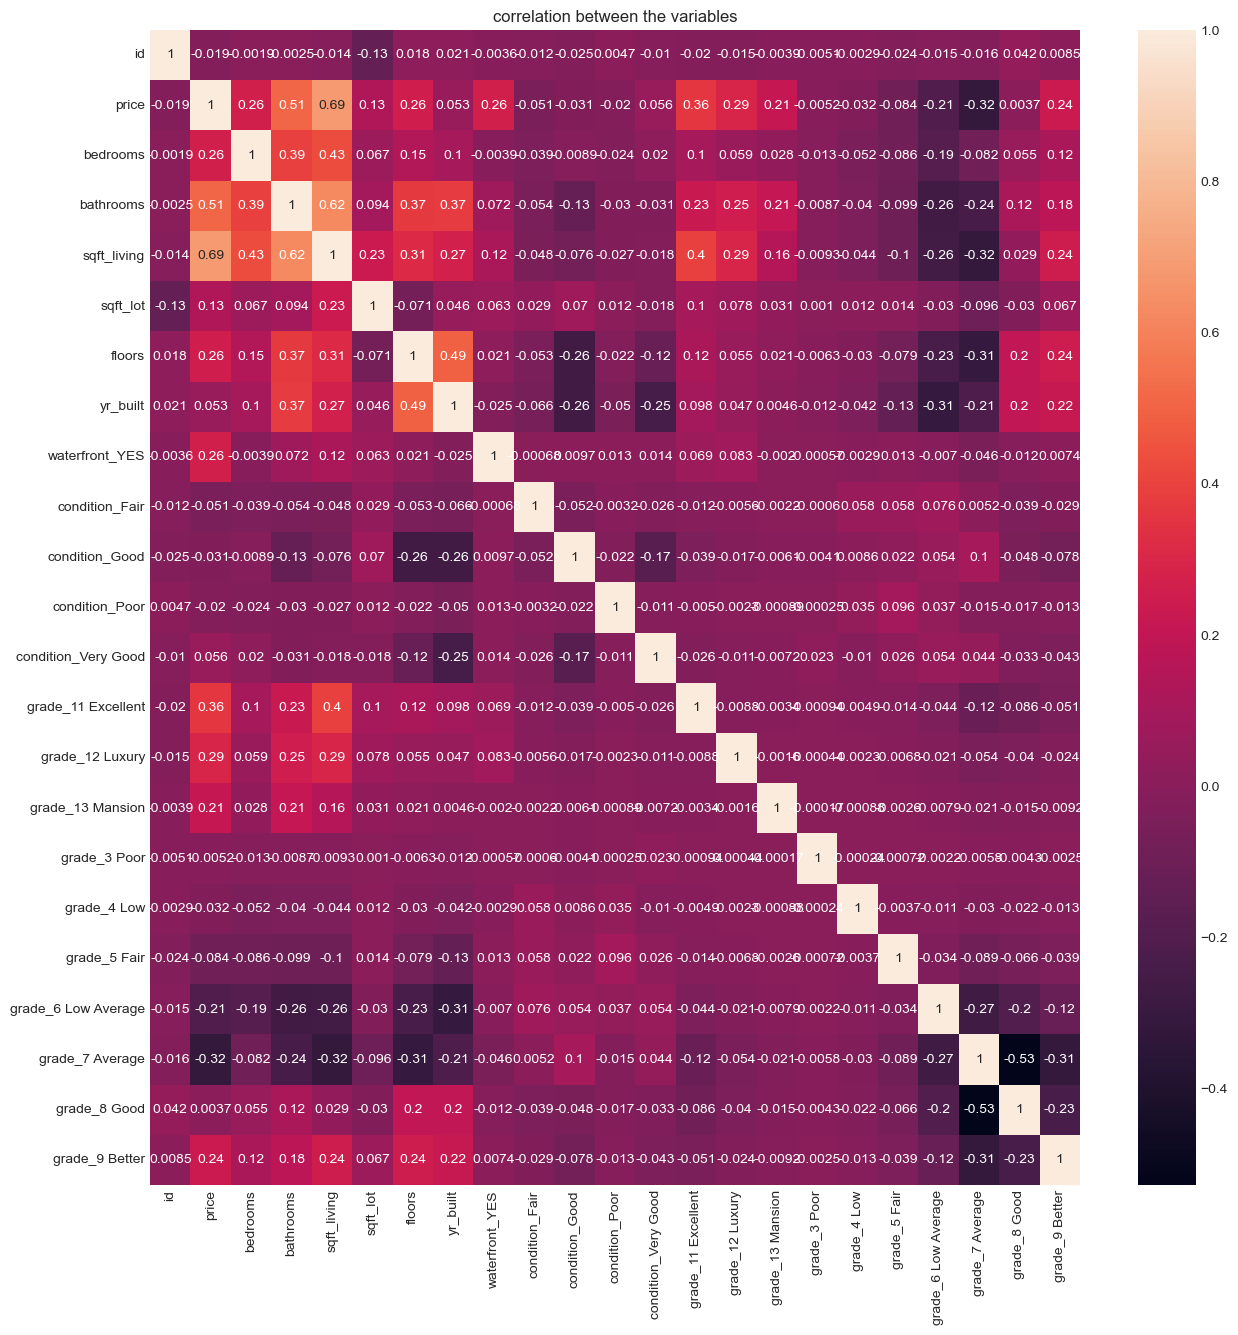

In [46]:
corr = df.corr()
#plot a heatmap to visualize the correlation between our variables
plt.figure(figsize = (15,15))
sns.heatmap(corr,annot = True)
plt.title("correlation between the variables")

Most of the variables have a nery low correlation with each other.

The white boxes with a correlation coefficient of 1 are the correlation between the variables with themselves.

Most of the boxes are dark and this shows a weak correlation hence the data is ready to fit into our model for regression analysis

In [48]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'yr_built', 'waterfront_YES', 'condition_Fair',
       'condition_Good', 'condition_Poor', 'condition_Very Good',
       'grade_11 Excellent', 'grade_12 Luxury', 'grade_13 Mansion',
       'grade_3 Poor', 'grade_4 Low', 'grade_5 Fair', 'grade_6 Low Average',
       'grade_7 Average', 'grade_8 Good', 'grade_9 Better'],
      dtype='object')

# 1: Baseline model

To build the baseline model, we first split our data into training and testing sets using the train_test_split function. This allows us to evaluate the model's performance on unseen data and assess its generalization capabilities.

Next, we initialize a LinearRegression model and fit it to the training data. This involves estimating the coefficients that best describe the relationship between the features and the target variable, which in our case is the house prices in King County.

Once the model is trained, we make predictions on the testing data using the predict function. These predictions are compared against the actual house prices to evaluate the model's performance.

To assess the model's accuracy, we calculate several evaluation metrics, including Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), R-squared (R2), and Mean Absolute Percentage Error (MAPE)

In [51]:
# Select the features and target variable for the Linear Regression model
features = df_encoded.drop(['price'], axis=1)
target = df_encoded['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
linear_model = LinearRegression()

# Fit the model to the training data
linear_model.fit(X_train, y_train)

# Make predictions on the testing data
linear_pred = linear_model.predict(X_test)

# Calculate evaluation metrics for the Linear Regression model
linear_mae = mean_absolute_error(y_test, linear_pred)
linear_mse = mean_squared_error(y_test, linear_pred)
linear_rmse = np.sqrt(linear_mse)
linear_r2 = r2_score(y_test, linear_pred)
linear_mape = np.mean(np.abs((y_test - linear_pred) / y_test)) * 100
# Print the evaluation metrics
print("Linear Regression Model:")
print("Mean Absolute Error (MAE):", linear_mae)
print("Mean Squared Error (MSE):", linear_mse)
print("Root Mean Squared Error (RMSE):", linear_rmse)
print("R-squared (R2):", linear_r2)
print(f"Mean Absolute Percentage Error (MAPE): {linear_mape:.2f}%")

Linear Regression Model:
Mean Absolute Error (MAE): 132748.35180181699
Mean Squared Error (MSE): 40570699936.85644
Root Mean Squared Error (RMSE): 201421.69678775035
R-squared (R2): 0.66497187125679
Mean Absolute Percentage Error (MAPE): 28.21%


From our evaluation metrics above we can conclude that:

From the Absolute Error(MAE), our models prediction of the price deviates from the actual house price with 132748.35 dollars.

Mean Squared Error(MSE): This metric shows the average squared difference between the actual price and the predicted prices which is 4057069936.99 dollars.

Root Mean Squared Error: This is the squareroot of the Mean Aquared Error (MSE). It is 201421.69.

R-squared: The r-squared is 0.6649. This means that or model can explain 66.49 % of the variance in house prices can be explained by the selected features.

Mean Absolute Percentage Error(MAPE): The MAPE is 28.21 %. This means that our prediction on house prices, deviates from the actual house prices by 28.21 %.






# 2. Random Forest Model

We Built another model using Random Forest algorithm. This aims at improving our model

In [53]:
# Select the features and target variable for the Random Forest Regression model
features = df_encoded.drop(['price'], axis=1)
target = df_encoded['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the Random Forest Regression model
rf_model = RandomForestRegressor()

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
rf_pred = rf_model.predict(X_test)

# Calculate evaluation metrics for the Random Forest Regression model
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_pred)
rf_mape = np.mean(np.abs((y_test - rf_pred) / y_test)) * 100
# Print the evaluation metrics
print("Random Forest Regression Model:")
print("Mean Absolute Error (MAE):", rf_mae)
print("Mean Squared Error (MSE):", rf_mse)
print("Root Mean Squared Error (RMSE):", rf_rmse)
print("R-squared (R2):", rf_r2)
print(f"Mean Absolute Percentage Error (MAPE): {rf_mape:.2f}%")

Random Forest Regression Model:
Mean Absolute Error (MAE): 115192.81308584545
Mean Squared Error (MSE): 32157749827.06223
Root Mean Squared Error (RMSE): 179325.8203022148
R-squared (R2): 0.7344450362966124
Mean Absolute Percentage Error (MAPE): 24.31%


# 3: Feature Selection Model

We further aim to improve our model using feture selction.We use the chi-square to check which independent variables have the strongest relationship with the target variable  

In [56]:
from sklearn.feature_selection import SelectKBest, f_regression, chi2
# Select the features and target variable
features = df_encoded.drop(['price'], axis=1)
target = df_encoded['price']

# Perform feature selection
selector = SelectKBest(score_func=f_regression, k=10)  
# Fit the selector to the features and target variable
selector.fit(features, target)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = features.columns[selected_feature_indices]

# Print the selected features
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront_YES',
       'grade_11 Excellent', 'grade_12 Luxury', 'grade_13 Mansion',
       'grade_7 Average', 'grade_9 Better'],
      dtype='object')


In [57]:
# Select the features and target variable:
features = df_encoded[selected_features]
target = df_encoded['price']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
# Initialize the linear regression model
model = LinearRegression()
# Fit the model to the training data
model.fit(X_train, y_train)
# Make predictions on the testing data
y_pred = model.predict(X_test)
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Error (MAE): 158613.13532505304
Mean Squared Error (MSE): 54184162470.065765
Root Mean Squared Error (RMSE): 232774.9180433016
R-squared (R2): 0.5525534785419633
Mean Absolute Percentage Error (MAPE): 34.62%


This model performs worse than our previous model. It produces large MAE  as well as a large MSE. This shows large errors in the prediction of the house prices.

The model also only explains 55.26% of the variance of actual prices caused by the independent variables.

# 4. Ensemble Model(Combining the three models)

We use the voting regressor to ensemble the three previous models. We aim to achieve better results from combining the three models

In [58]:
# Select the features and target variable for the ensemble model
features = df_encoded.drop(['price'], axis=1)
target = df_encoded['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the individual models
linear_model = LinearRegression()
model = LinearRegression()
rf_model = RandomForestRegressor()

# Fit the models to the training data
linear_model.fit(X_train, y_train)
model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Create the ensemble model with the individual models
ensemble_model = VotingRegressor([('linear', linear_model),('selected' , model), ('random_forest', rf_model)])

# Fit the ensemble model to the training data
ensemble_model.fit(X_train, y_train)

# Make predictions on the testing data using the ensemble model
ensemble_pred = ensemble_model.predict(X_test)

# Calculate evaluation metrics for the ensemble model
ensemble_mae = mean_absolute_error(y_test, ensemble_pred)
ensemble_mse = mean_squared_error(y_test, ensemble_pred)
ensemble_rmse = np.sqrt(ensemble_mse)
ensemble_r2 = r2_score(y_test, ensemble_pred)
ensemble_mape = np.mean(np.abs((y_test - ensemble_pred) / y_test)) * 100
# Print the evaluation metrics for the ensemble model
print("Ensemble Model:")
print("Mean Absolute Error (MAE):", ensemble_mae)
print("Mean Squared Error (MSE):", ensemble_mse)
print("Root Mean Squared Error (RMSE):", ensemble_rmse)
print("R-squared (R2):", ensemble_r2)
print(f"Mean Absolute Percentage Error (MAPE): {ensemble_mape:.2f}%")

Ensemble Model:
Mean Absolute Error (MAE): 122772.80092523948
Mean Squared Error (MSE): 34854259726.07145
Root Mean Squared Error (RMSE): 186692.95574839305
R-squared (R2): 0.7121775706869815
Mean Absolute Percentage Error (MAPE): 26.12%


# Visualization of our evaluation metrics from the four models

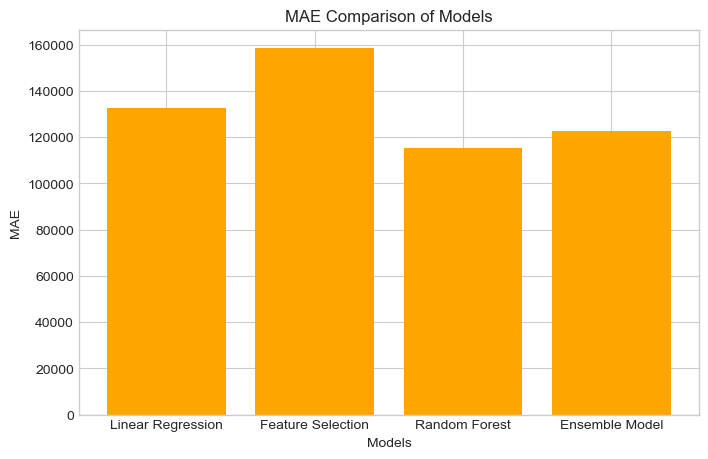

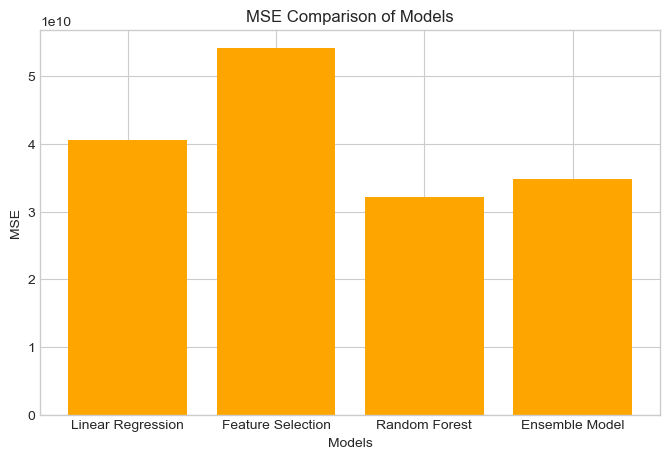

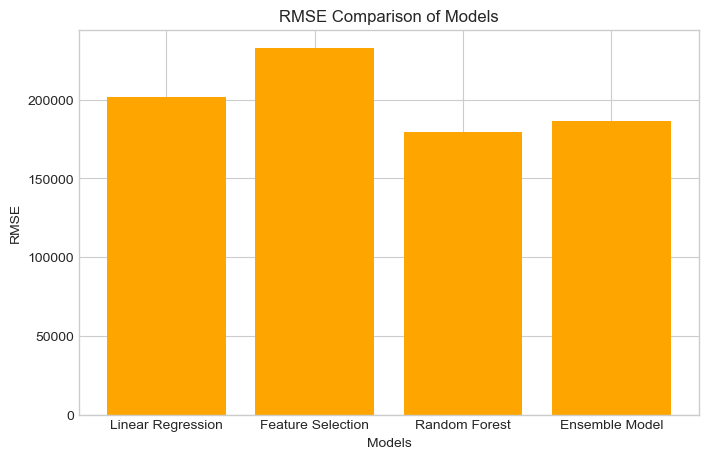

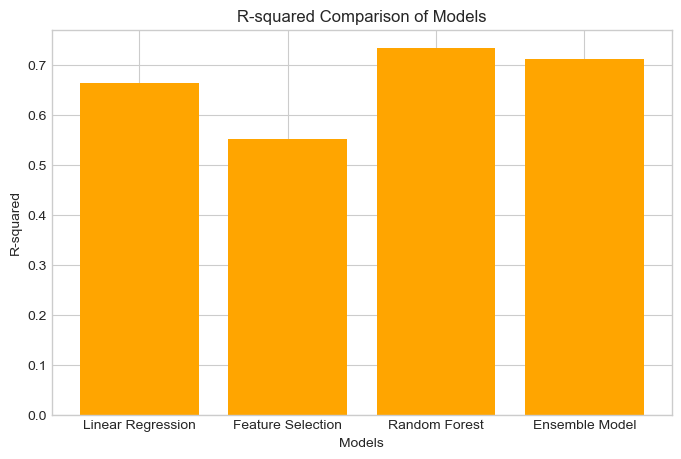

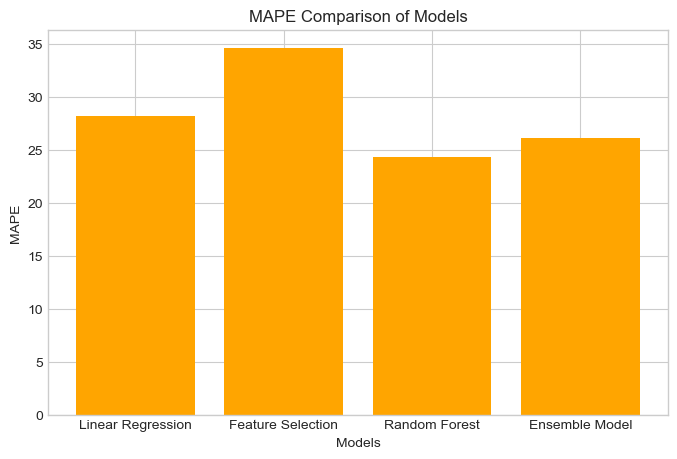

In [59]:
# Evaluation metrics for each model
mae_values = [linear_mae, mae, rf_mae, ensemble_mae]  # Add the respective MAE values for each model
mse_values = [linear_mse, mse, rf_mse, ensemble_mse]  # Add the respective MSE values for each model
rmse_values = [linear_rmse, rmse, rf_rmse, ensemble_rmse]  # Add the respective RMSE values for each model
r2_values = [linear_r2, r2, rf_r2, ensemble_r2]  # Add the respective R-squared values for each model
mape_values = [linear_mape, mape, rf_mape, ensemble_mape]  # Add the respective MAPE values for each model

# Model names
model_names = ['Linear Regression', 'Feature Selection', 'Random Forest', 'Ensemble Model']  # Add the names of each model

# Plot MAE
plt.figure(figsize=(8, 5))
plt.bar(model_names, mae_values, color='orange')
plt.xlabel('Models')
plt.ylabel('MAE')
plt.title('MAE Comparison of Models')
plt.show()

# Plot MSE
plt.figure(figsize=(8, 5))
plt.bar(model_names, mse_values, color='orange')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.title('MSE Comparison of Models')
plt.show()

# Plot RMSE
plt.figure(figsize=(8, 5))
plt.bar(model_names, rmse_values, color='orange')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('RMSE Comparison of Models')
plt.show()

# Plot R-squared
plt.figure(figsize=(8, 5))
plt.bar(model_names, r2_values, color='orange')
plt.xlabel('Models')
plt.ylabel('R-squared')
plt.title('R-squared Comparison of Models')
plt.show()

# Plot MAPE
plt.figure(figsize=(8, 5))
plt.bar(model_names, mape_values, color='orange')
plt.xlabel('Models')
plt.ylabel('MAPE')
plt.title('MAPE Comparison of Models')
plt.show()

In [60]:
#eXPLANATIONS HERE

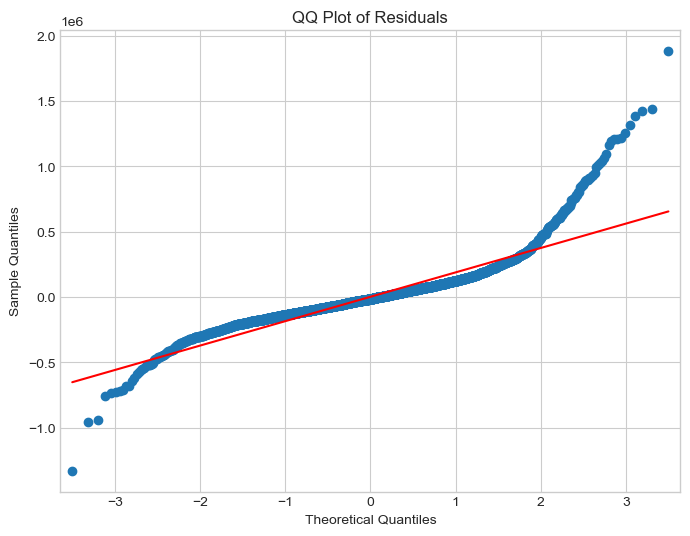

In [61]:
residuals = y_test - ensemble_pred

# Generate QQ plot
fig, ax = plt.subplots(figsize=(8, 6))
sm.qqplot(residuals, line='s', ax=ax)

# Set plot labels
ax.set_title("QQ Plot of Residuals")
ax.set_xlabel("Theoretical Quantiles")
ax.set_ylabel("Sample Quantiles")

# Display the plot
plt.show()

The residuals are fitted in the diagonal line indicating that the data follows a normal distribution. This means that our data is for linear regression as normality is one of the assumptions of linear regression.

In [64]:
# Get the coefficients from the linear regression model
linear_coeffs = linear_model.coef_

# Get the coefficients from the selected features model
model_coeffs = model.coef_

# Get the feature names
feature_names = features.columns

# Calculate the weighted average of the coefficients
ensemble_coeffs = (0.33 * linear_coeffs) + (0.33 * model_coeffs) + (0.33 * rf_model.feature_importances_)

# Print the coefficients
print("Ensemble Model Coefficients:")
for feature, coefficient in zip(feature_names, ensemble_coeffs):
    print(f"{feature}: {coefficient:.2f}")

Ensemble Model Coefficients:
id: 0.02
bedrooms: -3908.92
bathrooms: 26806.12
sqft_living: 56.71
sqft_lot: -0.70
floors: 17426.16
yr_built: -2235.16
waterfront_YES: 478279.10
condition_Fair: -21514.28
condition_Good: 14564.66
condition_Poor: -52375.99
condition_Very Good: 39461.47
grade_11 Excellent: 165794.81
grade_12 Luxury: 424309.21
grade_13 Mansion: 1256944.21
grade_3 Poor: -462218.45
grade_4 Low: -443726.10
grade_5 Fair: -449941.10
grade_6 Low Average: -404861.78
grade_7 Average: -332941.67
grade_8 Good: -249894.72
grade_9 Better: -129344.56


# Conclusions 

From our above coefficients we can infer that:

1 For each bedroom added,the price of the house reduces by 3902.92 dollars. 

2 For each bathroom added in the house, the price increases by 26806.12 dollars. This shows that an added number of logical bedrooms

3 For each square foot added to the living space,it add value to the property by an average of 56.71 dollars.

4 For  each squarefoot added to the parking lot, the price slightly drops by 0.7 dollars.

5 If a floor is added to the house, the price increases by 17426 dollars in average.

6 For each increase in year built, there is a reduction in price by 2235.16 dollars.This entails that a house built in the previous year has a price difference of 2235.15 dollars with one built in the present year.

7 A waterfront is very important in the pricing of the house. If  a house has a waterfront the price has an added 478279.10 dollars.

8 As for the condition: A house that is in a fair_condition and a poor_condition have a price drop of -21514.28 and -52375.99 dollars respectively.These conditions have a negative ipact on the priing of the house and should be improved. On the other hand, good_condition and a very good condition lead to aprice increase  of 14564.66 and 39461.47 dollars respectively.

9 In the grading of the house, Mansion,luxury and excellent graded houses influence better pricing of the property respectively. All the other grading have anegative impact on the pricing of the house and should be improved to fetch in a better price.


# Recommendations

1 Inrease the number of bathooms in the property since each bathroom leads to an increse in price of 26806.12 dollars.

2 From our model we can see that an addirional bedroom leads to a reduction in price. Instead we could improve the quality of the existing bedrooms in the property by modernizing and increasing the space in the bedroom.

3 Increase the space of our living area because an increase in living space by a squarefoot leads to an increase of price by an average of56.71 dollars.

4 Customizing our parking lots would also bring an additional appeal to the property. This is in place of adding the space in the parking lots which reduces the price slightly by 0.70 dollars.We could ccustomize our parking lots by adding some security features such as cameras and anti-theft alarms.

5 Since the floors of a house have a positive impact onn the price of te house.We could add additional floors to our house to fetch a better price. An additional floor attracts an extra 17426 dollars.

6 An addition to the year added reduces the pricing of a house by 2235.16 dollars. We can improve the house by discarding the ancient featues and replacing them with more modern features.(Or yet lie about the year built...coz how will they know anyway..heheeee!!!)

7 The waterfront...(This is a bad one)..if possible build a dam infront of the houses,and boom... you have you a property with a waterfront...don't yaa??!!That's how you rake in an extra 478279 dollars!! just like that...with a shovel and a spade....Whoooooo.

8 Improving the condition of the house through renovations and modernizing the house could lead to a better house condition which would increase the pricing of the house.

9 Mansions fetch in the most additional income followed by a luxury graded house and then excellent graded.These are the only three grades that have a positive impact on the pricing. If possible,all new_houses should be built with either of these three grades.Otherwise,,the already built houses should aim at improving the grading through physical renovations.

